In [1]:
import pandas as pd 
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

In [118]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline

In [3]:
db=pd.read_csv("3-customersatisfaction.csv")

In [4]:
db.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [5]:
db.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
db.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [7]:
X=db[["Customer Satisfaction"]]
y=db["Incentive"]

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [10]:
scaler=StandardScaler()

In [11]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [12]:
regression=LinearRegression()

In [13]:
regression.fit(X_train,y_train)

LinearRegression()

In [14]:
regression.coef_

array([2.18055442])

In [15]:
regression.intercept_

np.float64(3.426783171608169)

In [16]:
y_pred=regression.predict(X_test)

In [17]:
y_pred

array([ 7.00796705,  7.33494167,  4.45022986,  0.94161176,  6.48720674,
       -0.43467098,  5.54324884,  2.49785688,  7.08572662,  1.78776316,
        4.56336431,  7.06630992,  2.46163838,  2.95088708,  0.59758212,
        1.60080541,  3.67105636,  2.63115814,  4.09147519,  0.04213559,
        1.96587658,  5.87521676,  4.61493043,  0.80071287,  2.06267125])

In [18]:
r2=r2_score(y_test,y_pred)

In [19]:
r2

0.7336057174204198

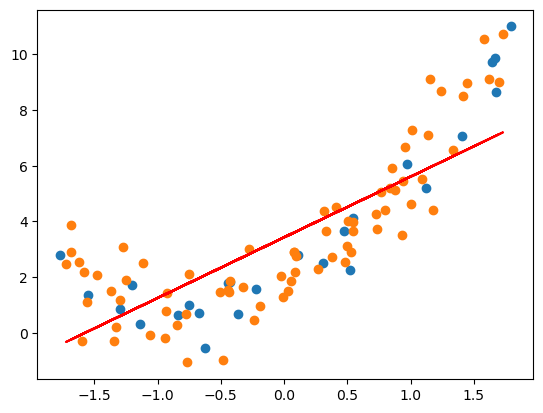

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_train,regression.predict(X_train),color="r")
plt.scatter(X_train,y_train)
plt.show()


In [22]:
polinom=PolynomialFeatures()


In [29]:
X_train_poly=polinom.fit_transform(X_train)

In [30]:
X_test_poly=polinom.transform(X_test)

In [33]:
regression.fit(X_train_poly,y_train)


LinearRegression()

In [35]:
regression.coef_


array([0.        , 2.40960367, 1.48518101])

In [36]:
regression.intercept_

np.float64(1.9416021619741661)

In [38]:
y_poly_pred=regression.predict(X_test_poly)

In [40]:
r2_polly=r2_score(y_test,y_poly_pred)

In [41]:
r2_polly

0.9492732221578819

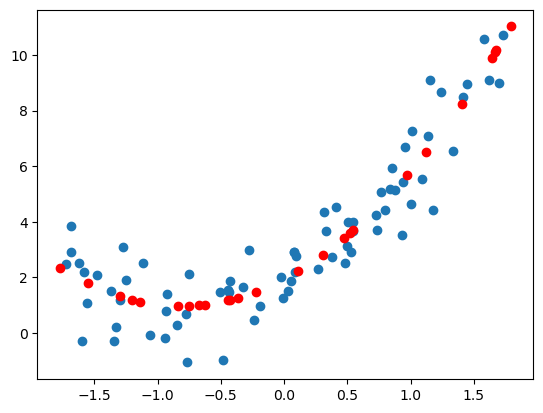

In [58]:
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_poly_pred,color="r")
plt.show()

In [59]:
poly=PolynomialFeatures(degree=3,include_bias=True)

In [60]:
X_train_p=poly.fit_transform(X_train)
X_test_p=poly.transform(X_test)

In [62]:
regression.fit(X_train_p,y_train)

LinearRegression()

In [63]:
regression.coef_

array([ 0.        ,  2.66703882,  1.47880804, -0.13979756])

In [64]:
regression.intercept_

np.float64(1.9264151195137897)

In [65]:
y_p=regression.predict(X_test_p)

In [66]:
r2_p=r2_score(y_test,y_p)

In [67]:
r2

0.7336057174204198

In [68]:
r2_p

0.9530672866075287

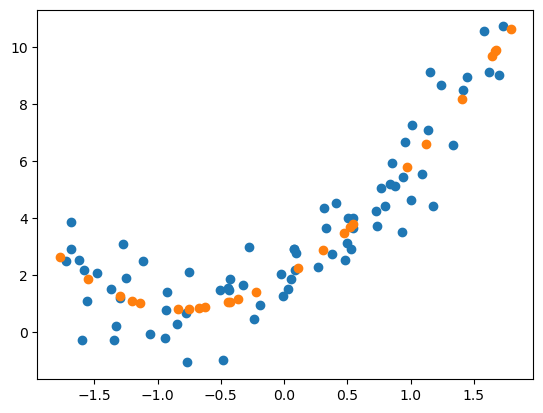

In [71]:
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_p)
plt.show()

In [97]:
new_ds=pd.read_csv("3-newdatas.csv")

In [98]:
new_ds.head()

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397


In [100]:


new_ds.rename(columns = {"0": "Customer Satisfaction"}, inplace=True)



In [114]:


X_new = new_ds[["Customer Satisfaction"]]

X_new = scaler.transform(X_new)

In [115]:
X_new_poly = poly.transform(X_new)

In [116]:
y_new = regression.predict(X_new_poly)

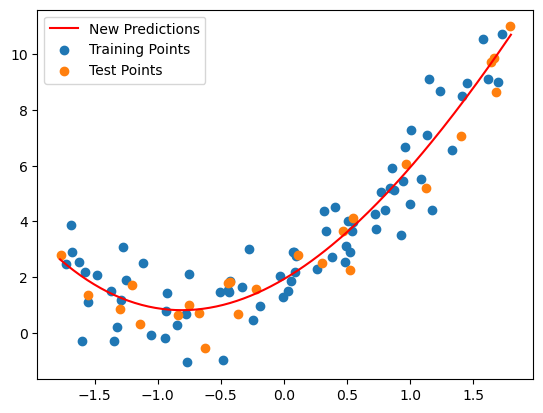

In [117]:


plt.plot(X_new, y_new, "r", label="New Predictions")
plt.scatter(X_train, y_train, label="Training Points")
plt.scatter(X_test, y_test, label="Test Points")
plt.legend()
plt.show()



In [124]:
def poly_regression(degree):
    scaler=StandardScaler()
    poly_feature=PolynomialFeatures(degree=degree)
    reg=LinearRegression()
    pipeline=Pipeline(
        [
            ("standart_scaler",scaler),
            ("poly_feature",poly_feature),
            ("lin_reg",reg)
            
        ]
    )
    pipeline.fit(X_train,y_train)
    score=pipeline.score(X_test,y_test)
    print(score)

In [136]:
poly_regression(2)

0.9492732221578819
